In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
from scipy import stats
import time
from matplotlib.colors import LogNorm
from numpy.random import randn
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import os
import process_abalone_utility as pau

In [2]:
def compare_pe_spectrum(area1,area2,area3=None,area4=None,area5=None, bins = 200,
                        volts = (7,8,9,10,11), ledv = 3, low = 0, high = 100):
    area_space = np.linspace(low,high, bins)
    h1, t1 = np.histogram(area1, bins=area_space)
    h2, t2 = np.histogram(area2, bins=area_space)
    plt.figure(figsize=(12,6))
    a1 = plt.hist(area1,bins=area_space,histtype='step',lw=2,label=f'ABALONE at {volts[0]} kV')
    a2 = plt.hist(area2,bins=area_space,histtype='step',lw=2,label=f'ABALONE at {volts[1]} kV')
    if area3 is not None:
        h3, t3 = np.histogram(area3, bins=area_space)
        a3 = plt.hist(area3,bins=area_space,histtype='step',lw=2,label=f'ABALONE at {volts[2]} kV')
    if area4 is not None:
        h4, t4 = np.histogram(area4, bins=area_space)
        a4 = plt.hist(area4,bins=area_space,histtype='step',lw=2,label=f'ABALONE at {volts[3]} kV')
    if area5 is not None:
        h5, t5 = np.histogram(area5, bins=area_space)
        a5 = plt.hist(area5,bins=area_space,histtype='step',lw=2,label=f'ABALONE at {volts[4]} kV')
    plt.title(f'PE spectrum comparison - LED at {ledv:.1f} V')
    plt.xlabel('area (ADC x $\mu$s)',ha='right',x=1)
    plt.ylabel('counts',ha='right',y=1)
    plt.legend(fontsize=14)

In [3]:
df_7 = pd.read_hdf('processed_data/data_ABALONE_7kV_SiPM2_32V_LED_3V.h5')
df_8 = pd.read_hdf('processed_data/data_ABALONE_8kV_SiPM2_32V_LED_3V.h5')
df_9 = pd.read_hdf('processed_data/data_ABALONE_9kV_SiPM2_32V_LED_3V.h5')
df_10 = pd.read_hdf('processed_data/data_ABALONE_10kV_SiPM2_32V_LED_3V.h5')
df_11 = pd.read_hdf('processed_data/data_ABALONE_11kV_SiPM2_32V_LED_3V.h5')
df_12 = pd.read_hdf('processed_data/data_ABALONE_12kV_SiPM2_32V_LED_3V.h5')
df_13 = pd.read_hdf('processed_data/data_ABALONE_13kV_SiPM2_32V_LED_3V.h5')
df_14 = pd.read_hdf('processed_data/data_ABALONE_14kV_SiPM2_32V_LED_3V.h5')
df_15 = pd.read_hdf('processed_data/data_ABALONE_15kV_SiPM2_32V_LED_3V.h5')
df_16 = pd.read_hdf('processed_data/data_ABALONE_16kV_SiPM2_32V_LED_3V.h5')
df_17 = pd.read_hdf('processed_data/data_ABALONE_17kV_SiPM2_32V_LED_3V.h5')
df_18 = pd.read_hdf('processed_data/data_ABALONE_18kV_SiPM2_32V_LED_3V.h5')

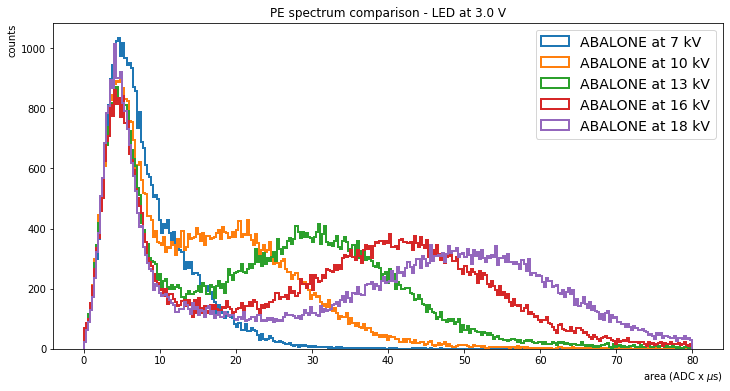

In [5]:
compare_pe_spectrum(df_7['area'],df_10['area'],df_13['area'],df_16['area'],df_18['area'],
                    volts=(7,10,13,16,18),low=0,high=80,bins=300,ledv=3)

In [7]:
df4_7 = pd.read_hdf('processed_data/data_ABALONE_7kV_SiPM2_32V_LED_4V.h5')
df4_8 = pd.read_hdf('processed_data/data_ABALONE_8kV_SiPM2_32V_LED_4V.h5')
df4_9 = pd.read_hdf('processed_data/data_ABALONE_9kV_SiPM2_32V_LED_4V.h5')
df4_10 = pd.read_hdf('processed_data/data_ABALONE_10kV_SiPM2_32V_LED_4V.h5')
df4_11 = pd.read_hdf('processed_data/data_ABALONE_11kV_SiPM2_32V_LED_4V.h5')
df4_12 = pd.read_hdf('processed_data/data_ABALONE_12kV_SiPM2_32V_LED_4V.h5')
df4_13 = pd.read_hdf('processed_data/data_ABALONE_13kV_SiPM2_32V_LED_4V.h5')
df4_14 = pd.read_hdf('processed_data/data_ABALONE_14kV_SiPM2_32V_LED_4V.h5')
df4_15 = pd.read_hdf('processed_data/data_ABALONE_15kV_SiPM2_32V_LED_4V.h5')
df4_16 = pd.read_hdf('processed_data/data_ABALONE_16kV_SiPM2_32V_LED_4V.h5')
df4_17 = pd.read_hdf('processed_data/data_ABALONE_17kV_SiPM2_32V_LED_4V.h5')
df4_18 = pd.read_hdf('processed_data/data_ABALONE_18kV_SiPM2_32V_LED_4V.h5')

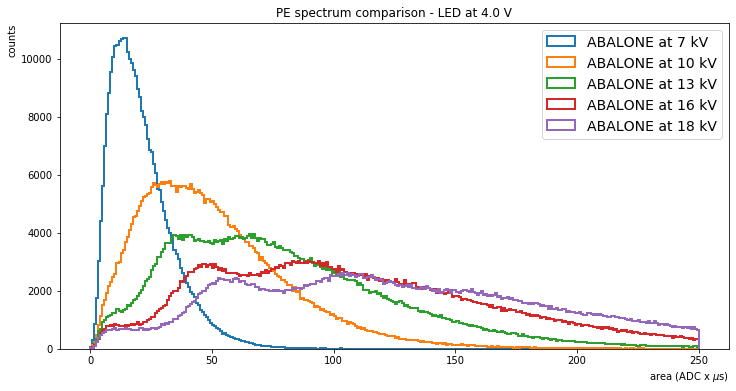

In [8]:
compare_pe_spectrum(df4_7['area'],df4_10['area'],df4_13['area'],df4_16['area'],df4_18['area'],
                    volts=(7,10,13,16,18), low=0, high=250, bins=300, ledv=4)

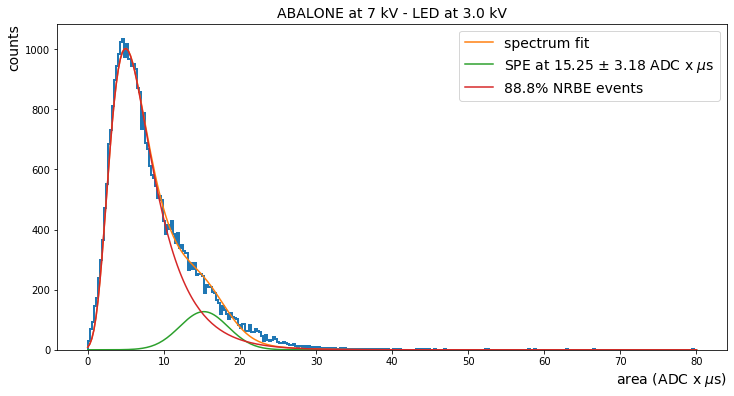

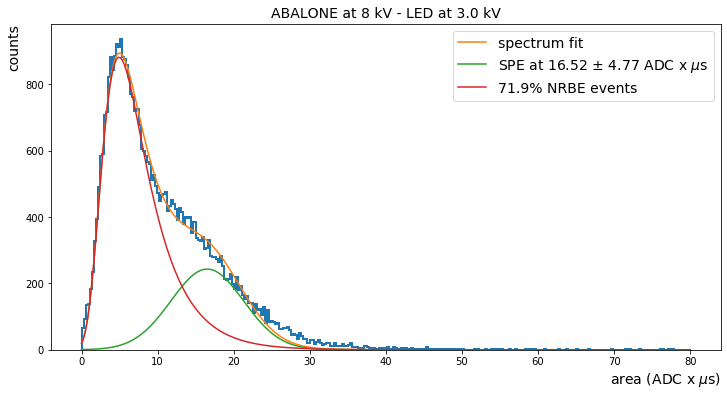

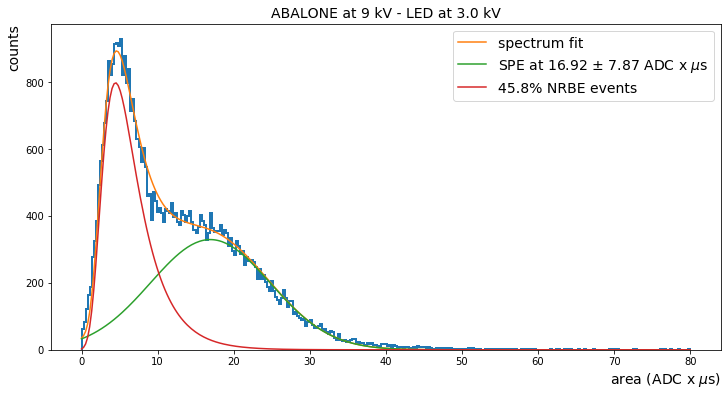

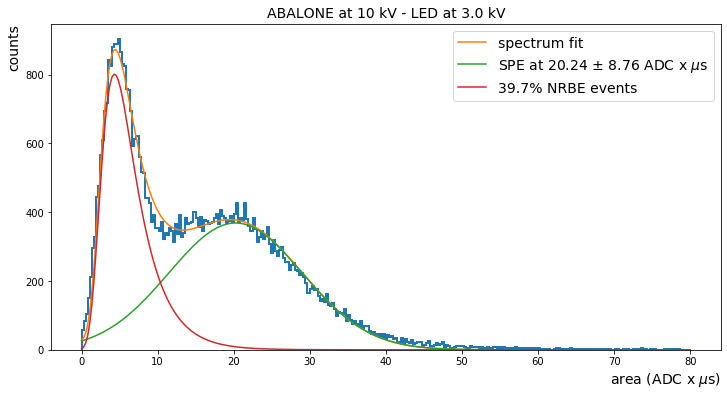

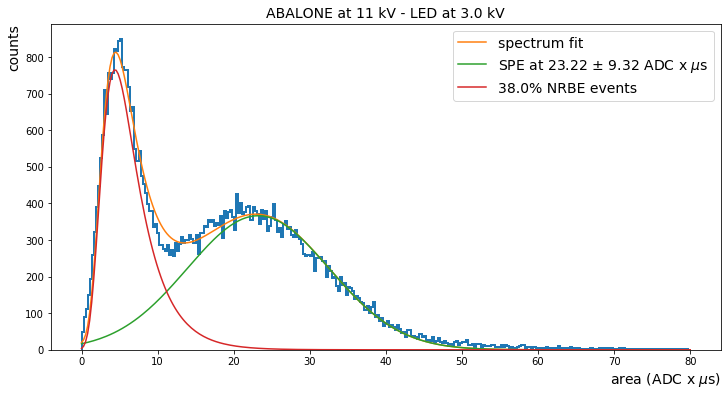

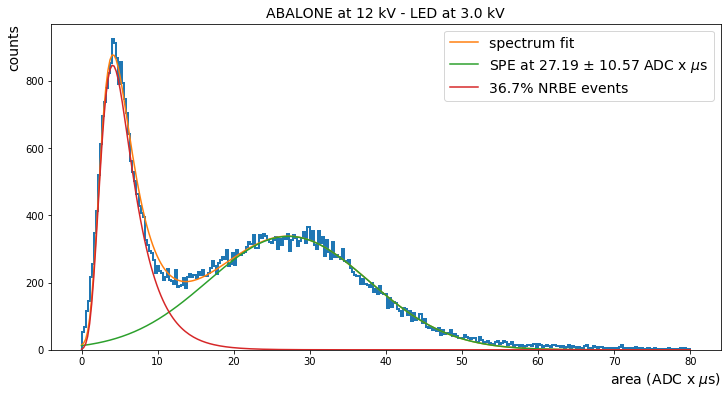

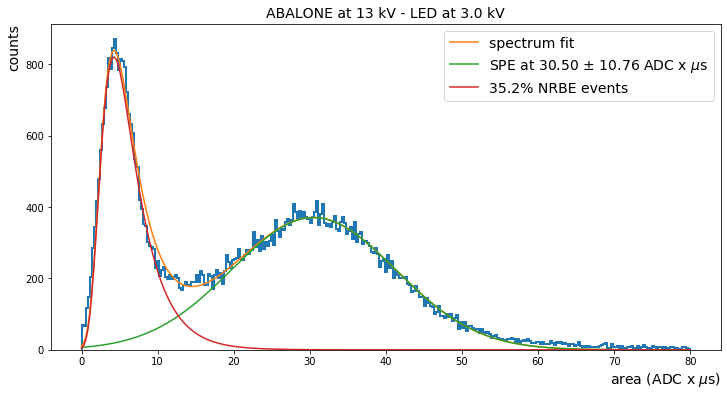

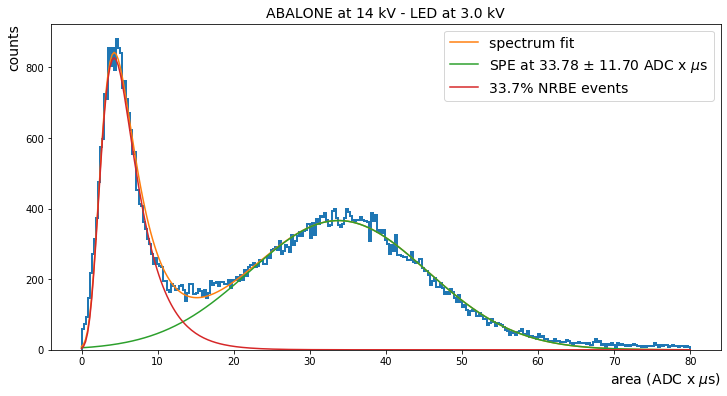

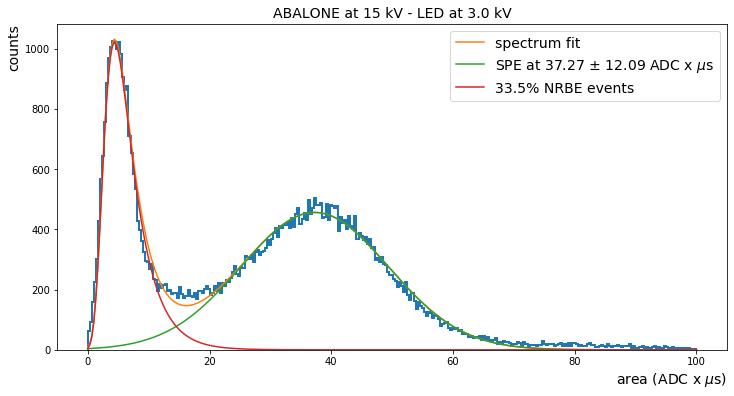

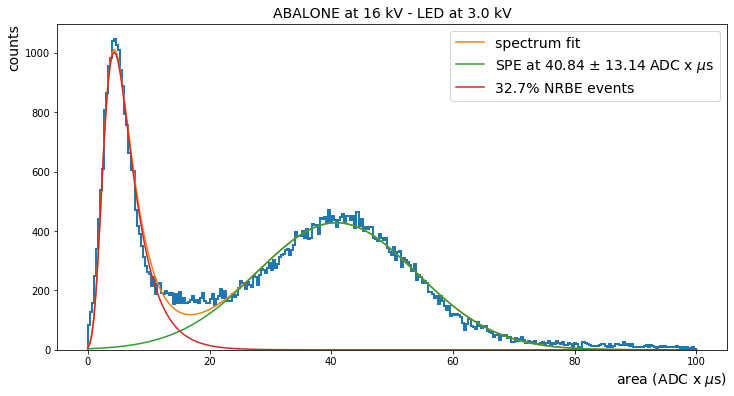

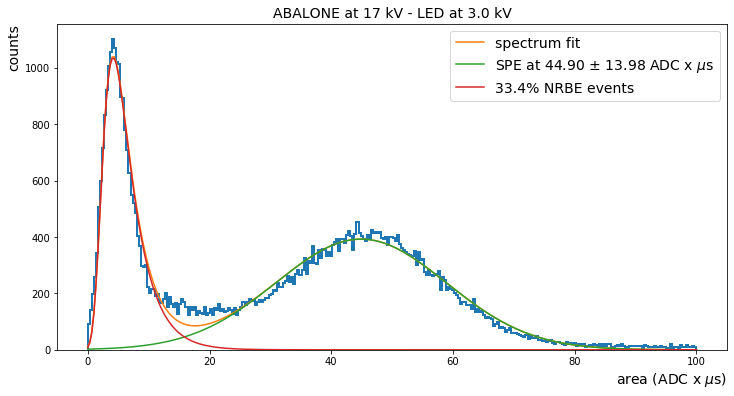

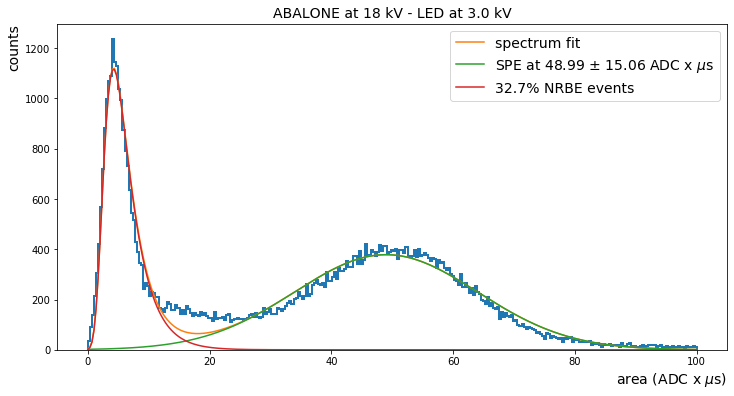

In [9]:
volts = np.arange(7,19)
spe, sig, nspe, nbs = np.zeros(len(volts)), np.zeros(len(volts)), np.zeros(len(volts)), np.zeros(len(volts))
spe[0],sig[0],nspe[0],nbs[0] = pau.fit_spe_spectrum(df_7['area'], volts = 7, low = 0, high = 80, bins = 300)
spe[1],sig[1],nspe[1],nbs[1] = pau.fit_spe_spectrum(df_8['area'], volts = 8, low = 0, high = 80, bins = 300)
spe[2],sig[2],nspe[2],nbs[2] = pau.fit_spe_spectrum(df_9['area'], volts = 9, low = 0, high = 80, bins = 300)
spe[3],sig[3],nspe[3],nbs[3] = pau.fit_spe_spectrum(df_10['area'], volts = 10, low = 0, high = 80, bins = 300)
spe[4],sig[4],nspe[4],nbs[4] = pau.fit_spe_spectrum(df_11['area'], volts = 11, low = 0, high = 80, bins = 300)
spe[5],sig[5],nspe[5],nbs[5] = pau.fit_spe_spectrum(df_12['area'], volts = 12, low = 0, high = 80, bins = 300)
spe[6],sig[6],nspe[6],nbs[6] = pau.fit_spe_spectrum(df_13['area'], volts = 13, low = 0, high = 80, bins = 300)
spe[7],sig[7],nspe[7],nbs[7] = pau.fit_spe_spectrum(df_14['area'], volts = 14, low = 0, high = 80, bins = 300)
spe[8],sig[8],nspe[8],nbs[8] = pau.fit_spe_spectrum(df_15['area'], volts = 15, low = 0, high = 100, bins = 300)
spe[9],sig[9],nspe[9],nbs[9] = pau.fit_spe_spectrum(df_16['area'], volts = 16, low = 0, high = 100, bins = 300)
spe[10],sig[10],nspe[10],nbs[10] = pau.fit_spe_spectrum(df_17['area'], volts = 17, low = 0, high = 100, bins = 300)
spe[11],sig[11],nspe[11],nbs[11] = pau.fit_spe_spectrum(df_18['area'], volts = 18, low = 0, high = 100, bins = 300)
gain = spe/1.113

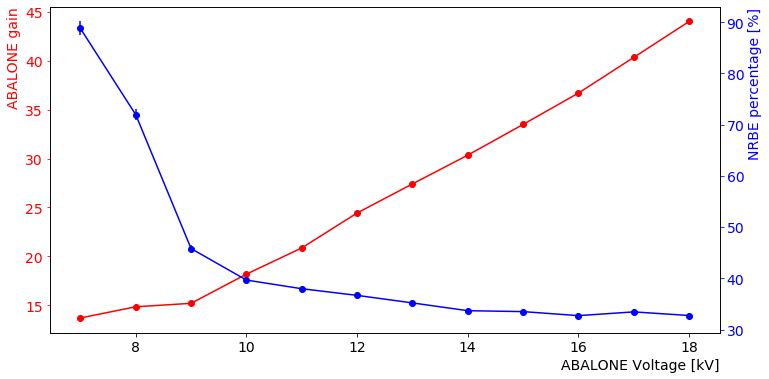

In [10]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(volts,gain,color='r',marker='o',label='ABALONE gain')
ax.set_xlabel('ABALONE Voltage [kV]', ha='right',x=1,fontsize=14)
ax.set_ylabel('ABALONE gain',ha='right',y=1,color="red",fontsize=14)
ax.tick_params(axis='y', colors='r',labelsize=14)
ax.tick_params(axis='x',labelsize=14)
ax2 = ax.twinx()
bs = nbs/(nbs+nspe)*100
bse = np.sqrt( nbs/(nbs+nspe)**2 + nbs**2/(nbs+nspe)**3)*100
ax2.errorbar(volts,bs,yerr=bse,color='b',marker='o',label='NRBE fraction')
ax2.set_ylabel('NRBE percentage [%]',ha='right',y=1,color="blue",fontsize=14)
ax2.tick_params(axis='y', colors='b',labelsize=14)